## Modelling and EDA

In [1]:
#Let's import our holy trinity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
#Let's read in our cleaned and formatted data-set
df = pd.read_csv('Capstone data/startup_dataset.csv', index_col=0)
df

,total_funding,status,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,website_availibility,MainCategory_e-commerce,...,MainCategory_healthcare,MainCategory_manufacturing,MainCategory_medicalGear,MainCategory_mobile,MainCategory_pharma,MainCategory_software,MainCategory_technology,USA_Region_Northeast,USA_Region_South,USA_Region_West
0,1150050.0,1,4,3,575025,465,566,12,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2050000.0,1,20,4,512500,307,285,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,4000000.0,1,48,2,2000000,328,328,6,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1600000.0,1,4,2,1600000,189,189,2,1,0,...,0,0,0,1,0,0,0,0,0,1
4,3550000.0,1,4,2,1775000,796,796,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9618,100000.0,1,4,3,23946976,192,20,1,1,0,...,0,0,0,1,0,0,0,0,0,1
9619,866550786.0,0,4,9,108318848,188,365,22,1,0,...,0,0,0,0,0,0,0,0,0,1
9620,34275015.0,1,24,4,8568753,505,1248,3,1,0,...,0,0,0,0,0,0,0,0,0,0
9621,3300000.0,1,34,2,1650000,209,209,10,1,0,...,0,0,0,1,0,0,0,1,0,0


Before we start modelling let's check for the Variance Inflation factor and the correlation between the columns.

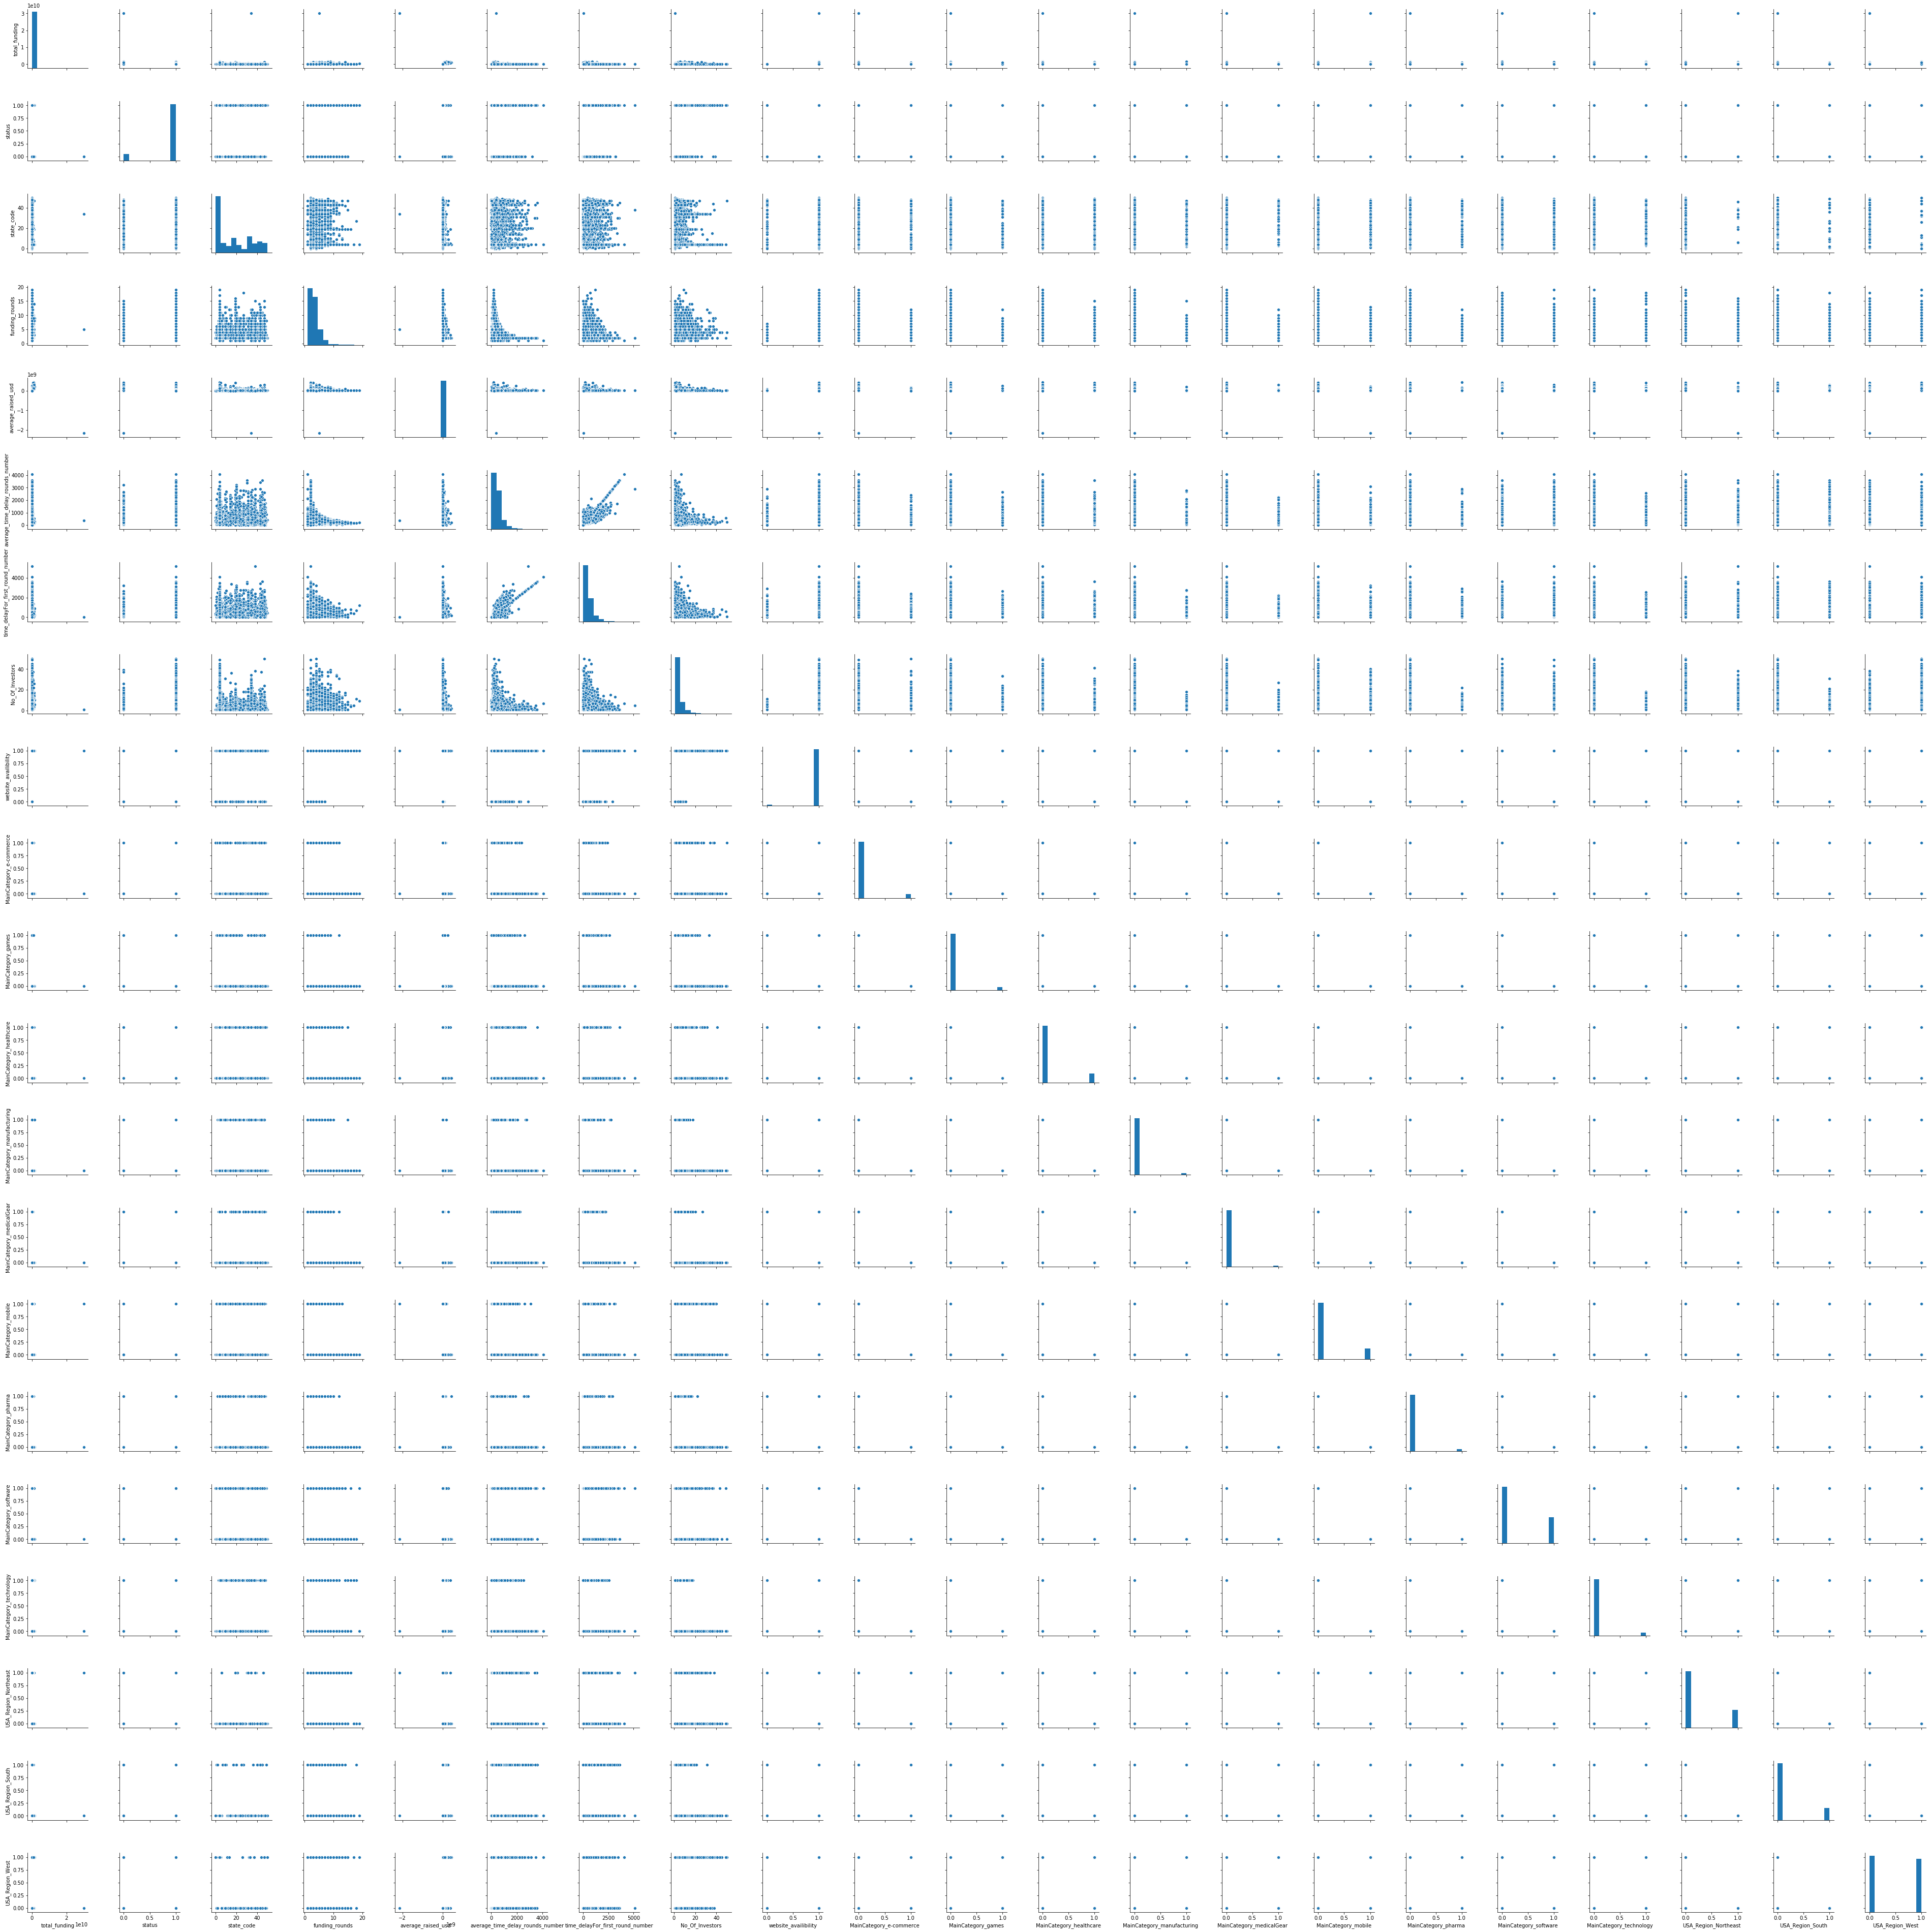

In [18]:
import seaborn as sns

sns.pairplot(df)
plt.show()

This is a very wide pair-plot and there seems to be some relationship between some columns. Let's check for the heatmap for correlation.

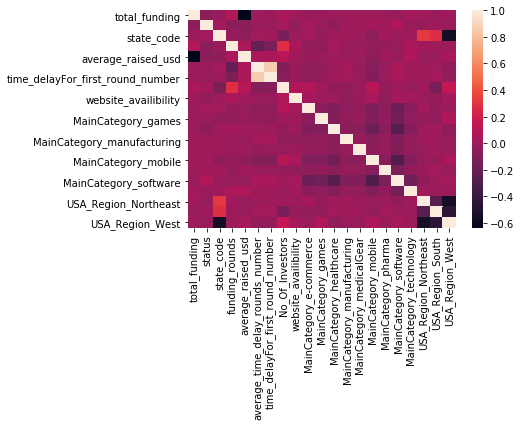

In [22]:
sns.heatmap(df.corr())

There seems to be some correlation between state_code, USA Regions ,funding rounds etc. Let's check for the Variance Inflation Factor to rule out any correlation,

In [183]:
# Let's denote our X to be all our features for getting VIF scores
X= df.drop(columns='status')
X

,total_funding,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,website_availibility,MainCategory_e-commerce,MainCategory_games,MainCategory_healthcare,MainCategory_manufacturing,MainCategory_medicalGear,MainCategory_mobile,MainCategory_pharma,MainCategory_software,MainCategory_technology,USA_Region_Northeast,USA_Region_South,USA_Region_West
0,1150050.0,4,3,575025,465,566,12,1,0,0,0,0,0,1,0,0,0,0,0,1
1,2050000.0,20,4,512500,307,285,1,1,1,0,0,0,0,0,0,0,0,0,1,0
2,4000000.0,48,2,2000000,328,328,6,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1600000.0,4,2,1600000,189,189,2,1,0,0,0,0,0,1,0,0,0,0,0,1
4,3550000.0,4,2,1775000,796,796,1,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9618,100000.0,4,3,23946976,192,20,1,1,0,0,0,0,0,1,0,0,0,0,0,1
9619,866550786.0,4,9,108318848,188,365,22,1,0,1,0,0,0,0,0,0,0,0,0,1
9620,34275015.0,24,4,8568753,505,1248,3,1,0,0,0,0,0,0,0,0,0,0,0,0
9621,3300000.0,34,2,1650000,209,209,10,1,0,0,0,0,0,1,0,0,0,1,0,0


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
pd.Series([VIF(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

total_funding                        1.791503
state_code                           3.446300
funding_rounds                       5.079630
average_raised_usd                   1.953916
average_time_delay_rounds_number    11.367227
time_delayFor_first_round_number     9.742269
No_Of_Investors                      2.216936
website_availibility                17.696554
MainCategory_e-commerce              1.481351
MainCategory_games                   1.348312
MainCategory_healthcare              1.830563
MainCategory_manufacturing           1.142630
MainCategory_medicalGear             1.131743
MainCategory_mobile                  2.098063
MainCategory_pharma                  1.187361
MainCategory_software                3.078673
MainCategory_technology              1.314543
USA_Region_Northeast                 3.059665
USA_Region_South                     2.495554
USA_Region_West                      5.476882
dtype: float64

We have a high correlation for 'average_time_delay_rounds_number', 'average_delayFor_first_round_number' and 'website_availibility'. Let's drop 'website_availibility' and 'average_delayFor_first_round_number' and check if we still have any correlation.

In [185]:
# Let's make a copy to be safe
bot= X.copy()

In [186]:
bot.drop(columns= ['time_delayFor_first_round_number','website_availibility'], inplace= True)

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
pd.Series([VIF(bot.values, i) 
               for i in range(bot.shape[1])], 
              index=bot.columns)

total_funding                       1.791478
state_code                          3.158710
funding_rounds                      4.326773
average_raised_usd                  1.953055
average_time_delay_rounds_number    2.427836
No_Of_Investors                     2.214168
MainCategory_e-commerce             1.359439
MainCategory_games                  1.268606
MainCategory_healthcare             1.633658
MainCategory_manufacturing          1.121866
MainCategory_medicalGear            1.095582
MainCategory_mobile                 1.827616
MainCategory_pharma                 1.148925
MainCategory_software               2.632074
MainCategory_technology             1.254721
USA_Region_Northeast                2.618718
USA_Region_South                    2.191395
USA_Region_West                     4.069617
dtype: float64

Now,after dropping high variance columns we can see that there is no more correlation and all the values are below 5.

In [191]:
X= bot

In [184]:
# Just to be safe dropping it from the df
df.drop(columns= ['time_delayFor_first_round_number','website_availibility'], inplace= True)

## Modelling

For modelling, let's split our data into X being all the feature responsible in predicting our target y i.e if a start-up will be a success or a failure.

In [7]:
# We already dropped 'status' above
# X= df.drop(columns='status')
# X

,total_funding,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,website_availibility,MainCategory_e-commerce,MainCategory_games,MainCategory_healthcare,MainCategory_manufacturing,MainCategory_medicalGear,MainCategory_mobile,MainCategory_pharma,MainCategory_software,MainCategory_technology,USA_Region_Northeast,USA_Region_South,USA_Region_West
0,1150050.0,4,3,575025,465,566,12,1,0,0,0,0,0,1,0,0,0,0,0,1
1,2050000.0,20,4,512500,307,285,1,1,1,0,0,0,0,0,0,0,0,0,1,0
2,4000000.0,48,2,2000000,328,328,6,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1600000.0,4,2,1600000,189,189,2,1,0,0,0,0,0,1,0,0,0,0,0,1
4,3550000.0,4,2,1775000,796,796,1,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9618,100000.0,4,3,23946976,192,20,1,1,0,0,0,0,0,1,0,0,0,0,0,1
9619,866550786.0,4,9,108318848,188,365,22,1,0,1,0,0,0,0,0,0,0,0,0,1
9620,34275015.0,24,4,8568753,505,1248,3,1,0,0,0,0,0,0,0,0,0,0,0,0
9621,3300000.0,34,2,1650000,209,209,10,1,0,0,0,0,0,1,0,0,0,1,0,0


In [189]:
# Denoting our target
y= df['status']
y

0       1
1       1
2       1
3       1
4       1
       ..
9618    1
9619    0
9620    1
9621    1
9622    1
Name: status, Length: 9617, dtype: int64

In [39]:
y.value_counts()

1    8651
0     966
Name: status, dtype: int64

Since we have more data points of class 1 than 0, there is an obvious class imbalance. Let's try fitting in all our baseline models first and check the scores.

### Logistic Regression Model:

In [192]:
X.shape, y.shape

((9617, 18), (9617,))

The shape of the dataset is 9617 rows with 18 columns.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3, 
                                                                random_state=1)

validation_scores = []
train_scores = []

c_values = [10**n for n in range(-4,4)]


#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.fit_transform(X_test)

# linear search over the hyper parameter space
for c in c_values:
    my_logreg = LogisticRegression(C=c, random_state=1)
    my_logreg.fit(X_train_scaled, y_train)

    # train on traning set
    train_scores.append(my_logreg.score(X_train_scaled, y_train))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation_scaled, y_validation))

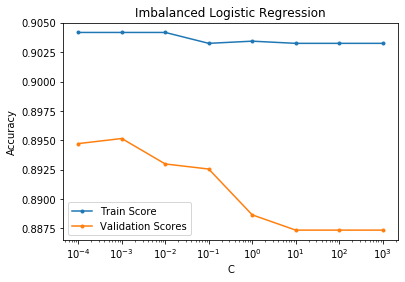

In [44]:
plt.figure()
plt.plot(c_values, train_scores,label="Train Score",marker='.')
plt.plot(c_values, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Imbalanced Logistic Regression')
plt.legend()
plt.show()

The model performs very poorly on the validation set. Let's get the score on the test set and the confusion matrix to see how many points it classifies correctly.

As we can see that the score for C value 0.001 is the highest in the graph we can select this value to get our accuracy score for our baseline Logistic regression model.

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)
mylogreg= LogisticRegression(C= 0.001, random_state=1)
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
mylogreg.fit(X_train_scaled, y_train)

X_test_scaled= scaler.fit_transform(X_test)
mylogreg.score(X_test_scaled, y_test)

0.8991683991683992

The accuracy score is 89% but let's check the other parameters.

In [80]:
y_pred= mylogreg.predict(X_test_scaled)

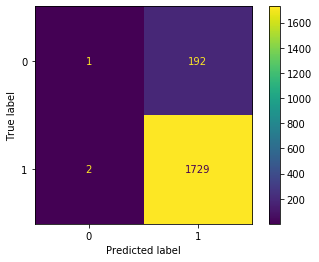

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(conf).plot()

The confusion matrix shows very bad results for the class 0 i.e the class which has low data points and belongs to the failed class of the start-ups.

In [82]:
log_mat= confusion_matrix(y_test, y_pred)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.01      0.01       193
           1       0.90      1.00      0.95      1731

    accuracy                           0.90      1924
   macro avg       0.62      0.50      0.48      1924
weighted avg       0.84      0.90      0.85      1924



The classification report shows poor recall and precision for class 0.

### KNN Model:

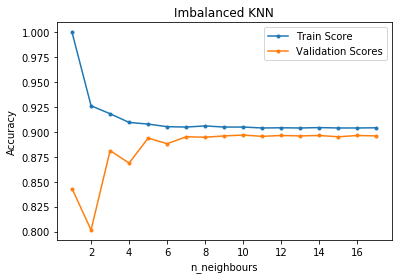

In [53]:


### KNN ###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3, 
                                                                random_state=1)
#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.fit_transform(X_test)

validation_scores = []
train_scores = []

for i in range(1, X_train.shape[1]):
    my_KNN = KNeighborsClassifier(n_neighbors= i, n_jobs=-1)
    my_KNN.fit(X_train_scaled, y_train)
    
    # train on traning set
    train_scores.append(my_KNN.score(X_train_scaled, y_train))
    
    # score on validation set
    validation_scores.append(my_KNN.score(X_validation_scaled, y_validation))

#Plotting a figure to get the best hyper-parameter
plt.plot(range(1, X_train.shape[1]), train_scores,label="Train Score",marker='.')
plt.plot(range(1, X_train.shape[1]), validation_scores,label="Validation Scores",marker='.')
#plt.xscale('log')
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')
plt.title('Imbalanced KNN')
plt.legend()
plt.show()

In [55]:
scaler= StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)
best_model = KNeighborsClassifier(n_neighbors = 11, n_jobs= -1)
best_model.fit(scaler.fit_transform(X_train), y_train)
print(f' The accuracy for the test set is {best_model.score(scaler.fit_transform(X_test), y_test)}')

 The accuracy for the test set is 0.8903326403326404


In [60]:
X_test_scaled = scaler.fit_transform(X_test)
pred= best_model.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.42      0.05      0.09       207
           1       0.90      0.99      0.94      1717

    accuracy                           0.89      1924
   macro avg       0.66      0.52      0.51      1924
weighted avg       0.84      0.89      0.85      1924



We still have a poor recall score for class 0, let's check the confusion matrix.

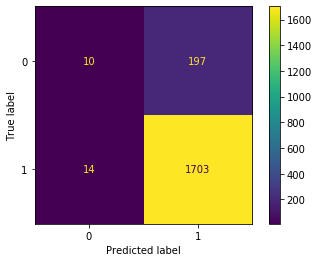

In [61]:
knn_mat= confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(knn_mat).plot()

This model is still better than logistic regression but still mis-classifies 197 points belonging to class 0 to class 1.

## Decision tree Model:

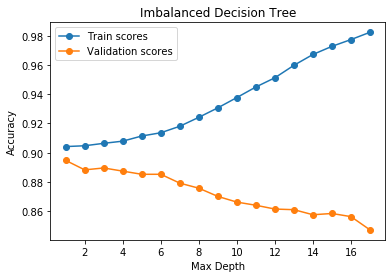

In [62]:
from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)

X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

# Scaling the data
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled- scaler.transform(X_test)

validation_scores= []
train_scores= []

max_range= np.arange(1,18)
for d in max_range:
    dt= DecisionTreeClassifier(max_depth= d)
    # Fit and score
    dt.fit(X_train,y_train)

    validation_scores.append(dt.score(X_validation, y_validation))
    train_scores.append(dt.score(X_train, y_train))

#Plotting
plt.figure()
plt.plot(max_range, train_scores, label='Train scores', marker='o')
plt.plot(max_range, validation_scores, label= 'Validation scores', marker= 'o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Imbalanced Decision Tree')
plt.legend()
plt.show()


The decision tree performs a poor job and the scores on the validation deteriorates but we can select the max-depth to be 3 because it seems to have the highest score and then the graph drops.

In [64]:
scaler= StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)
my_DT_model = DecisionTreeClassifier(max_depth = 3)
my_DT_model.fit(scaler.fit_transform(X_train), y_train)
print(f' The accuracy score on the test set is {my_DT_model.score(scaler.fit_transform(X_test), y_test)}')

 The accuracy score on the test set is 0.8892931392931392


In [65]:
pred= my_DT_model.predict(X_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.25      0.01      0.03       207
           1       0.89      0.99      0.94      1717

    accuracy                           0.89      1924
   macro avg       0.57      0.50      0.48      1924
weighted avg       0.82      0.89      0.84      1924



In [66]:
dt_mat= confusion_matrix(y_test,pred)

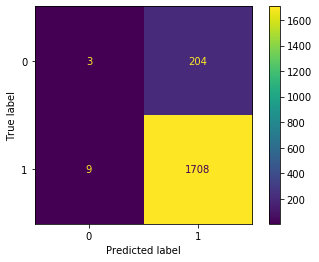

In [67]:
ConfusionMatrixDisplay(dt_mat).plot()

These are still poor recall scores and a bad confusion matrix for class 0.

## Random Forest

Done with 10...
Done with 20...
Done with 30...
Done with 40...
Done with 50...
Done with 60...
Done with 70...
Done with 80...
Done with 90...


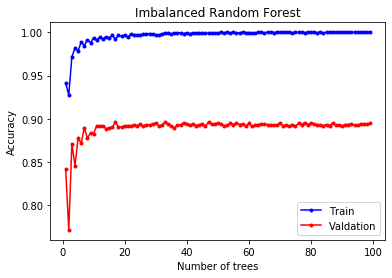

In [72]:

from sklearn.ensemble import RandomForestClassifier

X_remainder, X_test, y_remainder, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)

X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled= scaler.transform(X_test)


train_score_list = []
validation_list = []

for n_estimators in range(1, 100):
    # fit model
    forest = RandomForestClassifier(n_estimators = n_estimators)
    forest.fit(X_train, y_train)

    # score on training set
    train_score = forest.score(X_train, y_train) 
    train_score_list.append(train_score)

    
    validation_score = forest.score(X_validation, y_validation)
    validation_list.append(validation_score)
    
    # tracking progress
    if n_estimators % 10 == 0:
        print(f"Done with {n_estimators}...")
    
# Plot
plt.figure()
plt.plot(range(1, 100), train_score_list, color = "blue", marker = ".", label = "Train")
plt.plot(range(1, 100), validation_list, color = "red", marker = ".", label = "Valdation")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Imbalanced Random Forest")
plt.legend()
plt.show()

In [73]:
scaler= StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)
forest= RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8913721413721414

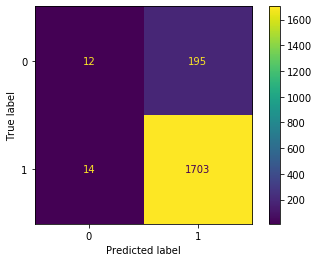

In [74]:
y_pred= forest.predict(X_test)
forest_mat= confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(forest_mat).plot()

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.06      0.10       207
           1       0.90      0.99      0.94      1717

    accuracy                           0.89      1924
   macro avg       0.68      0.52      0.52      1924
weighted avg       0.85      0.89      0.85      1924



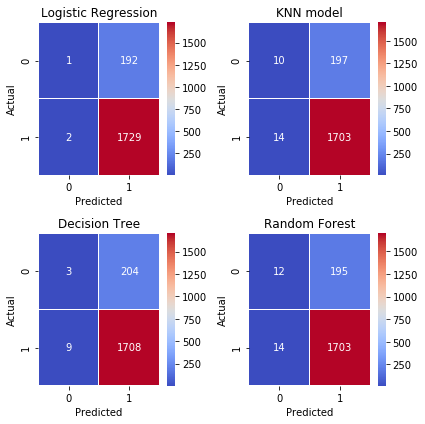

In [178]:
import seaborn as sns
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(6,6))
#fig('Correlation Matrix')

sns.heatmap(log_mat, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[0,0] )
ax[0,0].set_title('Logistic Regression')
ax[0,0].set_ylabel('Actual')
ax[0,0].set_xlabel('Predicted')

sns.heatmap(knn_mat, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[0,1] )
ax[0,1].set_title('KNN model')
ax[0,1].set_ylabel('Actual')
ax[0,1].set_xlabel('Predicted')

sns.heatmap(dt_mat, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[1,0] )
ax[1,0].set_title('Decision Tree')
ax[1,0].set_ylabel('Actual')
ax[1,0].set_xlabel('Predicted')

sns.heatmap(forest_mat, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[1,1] )
ax[1,1].set_title('Random Forest')
ax[1,1].set_ylabel('Actual')
ax[1,1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

Since all the models had poor recall score and mis-classified a lot of data points for the class 0, we can try to use some resampling methods to combat the imbalance and get better accuracies in terms of recall.

### Random Oversampler

In [86]:
# Let's try random oversampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

In [87]:
sampler=RandomOverSampler(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

In [88]:
y_train.value_counts()

1    6920
0    6920
Name: status, dtype: int64

There is now equal balance in both the classes.

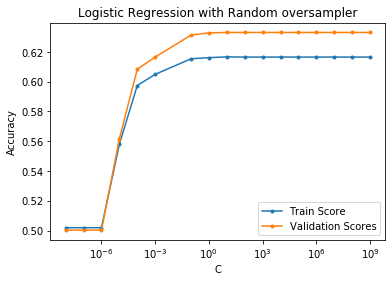

In [89]:
from sklearn.linear_model import LogisticRegression

validation_scores = []
train_scores = []

C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1,
                    1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

#Fitting it to a train set
sampler=RandomOverSampler(random_state=0)
X_rs,y_rs=sampler.fit_sample(X_train,y_train)

X_remainder, X_test, y_remainder, y_test= train_test_split(X_rs,y_rs, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3,random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.transform(X_validation)

# linear search over the hyper parameter space
for c in C_range:
    my_logreg = LogisticRegression(C=c, random_state=1)
    my_logreg.fit(X_train_scaled, y_train)

    # train on traning set
    train_scores.append(my_logreg.score(X_train_scaled, y_train))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation_scaled, y_validation))

plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression with Random oversampler')
plt.legend()
plt.show()

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=RandomOverSampler(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

X_test_scaled = scaler.transform(X_test)
# Since C=1 has a consistent high  score in the graph
my_final_model = LogisticRegression(C=1, random_state=1)

my_final_model.fit(scaler.transform(X_train),y_train)
my_final_model.score(X_test_scaled, y_test)

0.6548856548856549

This model has a poor accuracy score, now let's look at the recall score and the confusion matrix.

In [91]:
pred= my_final_model.predict(X_test_scaled)


In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.16      0.56      0.25       193
           1       0.93      0.67      0.78      1731

    accuracy                           0.65      1924
   macro avg       0.54      0.61      0.51      1924
weighted avg       0.85      0.65      0.72      1924



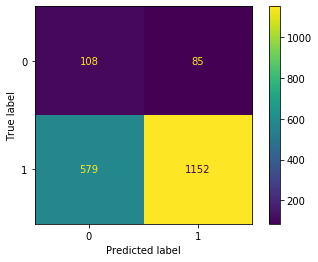

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import ConfusionMatrix

conf= confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(conf).plot()

In [94]:
log_mat_ro= confusion_matrix(y_test, pred)

The confusion matrix has certainly improved but overall it's still not the best model. Let's try all the other models and see if we can find something better.

## KNN random oversampler:

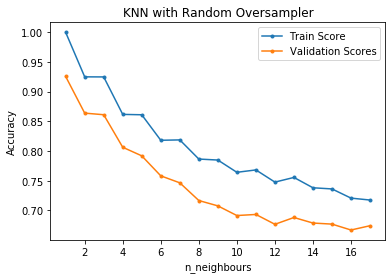

In [95]:

### KNN ###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

#Fitting it to a train set
sampler=RandomOverSampler(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)


from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X_rs,y_rs, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)
#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

validation_scores = []
train_scores = []

for i in range(1, X_train.shape[1]):
    my_KNN = KNeighborsClassifier(n_neighbors= i, n_jobs= -1)
    my_KNN.fit(X_train_scaled, y_train)
    
    # train on traning set
    train_scores.append(my_KNN.score(X_train_scaled, y_train))
    
    # score on validation set
    validation_scores.append(my_KNN.score(X_validation_scaled, y_validation))

plt.plot(range(1, X_train.shape[1]), train_scores,label="Train Score",marker='.')
plt.plot(range(1, X_train.shape[1]), validation_scores,label="Validation Scores",marker='.')
#plt.xscale('log')
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')
plt.title('KNN with Random Oversampler')
plt.legend()
plt.show()

The graph seems to be deteriorating and the model doesn't seem to be performing very well. But we'll still select the neighbors to be 4 for the sake of getting the scores and confusion matrix

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=RandomOverSampler(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

X_test_scaled = scaler.transform(X_test)

best_model = KNeighborsClassifier(n_neighbors = 4)
best_model.fit(scaler.transform(X_train), y_train)
best_model.score(X_test_scaled, y_test)

0.7297297297297297

In [98]:
pred= best_model.predict(X_test_scaled)


In [99]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.13      0.31      0.19       193
           1       0.91      0.78      0.84      1731

    accuracy                           0.73      1924
   macro avg       0.52      0.54      0.51      1924
weighted avg       0.83      0.73      0.77      1924



In [100]:
knn_mat_ro= confusion_matrix(y_test,pred)

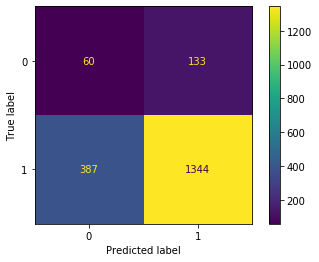

In [179]:
ConfusionMatrixDisplay(knn_mat_ro).plot()

It still misclassified a lot of data points for class 0. Let's continue the hunt for the best model.

## Decision tree random oversampler

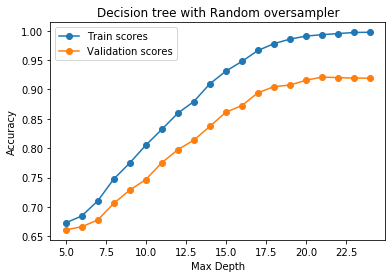

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

#Fitting to a train set
sampler=RandomOverSampler(random_state=0)
X_rs,y_rs=sampler.fit_sample(X_train,y_train)


from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X_rs,y_rs, test_size= 0.2, random_state= 1)

X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

#Scaling
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled= scaler.transform(X_test)

validation_scores= []
train_scores= []

max_range= np.arange(5,25)
for d in max_range:
    dt= DecisionTreeClassifier(max_depth= d)
    dt.fit(X_train,y_train)

    validation_scores.append(dt.score(X_validation, y_validation))
    train_scores.append(dt.score(X_train, y_train))

#Plot
plt.figure()
plt.plot(max_range, train_scores, label='Train scores', marker='o')
plt.plot(max_range, validation_scores, label= 'Validation scores', marker= 'o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision tree with Random oversampler')
plt.legend()
plt.show()


The model seems to be performing well so we'll select the max_depth to be 20 to get our scores.

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=RandomOverSampler(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

X_test_scaled = scaler.transform(X_test)
my_DT_model = DecisionTreeClassifier(max_depth = 18)
my_DT_model.fit(scaler.transform(X_train), y_train)
my_DT_model.score(X_test_scaled, y_test)

0.8009355509355509

In [105]:
pred= my_DT_model.predict(X_test_scaled)


In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.15      0.22      0.18       193
           1       0.91      0.87      0.89      1731

    accuracy                           0.80      1924
   macro avg       0.53      0.54      0.53      1924
weighted avg       0.83      0.80      0.82      1924



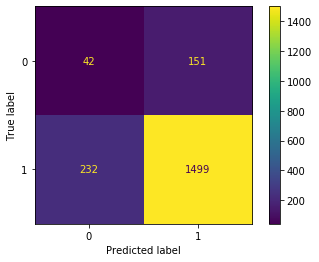

In [107]:
dt_mat_ro= confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(dt_mat_ro).plot()

Nothing new! seems to have low recall and a poor confusion matrix too.

## Random forest - random oversampler:

Done with 10...
Done with 20...
Done with 30...
Done with 40...
Done with 50...
Done with 60...
Done with 70...
Done with 80...
Done with 90...


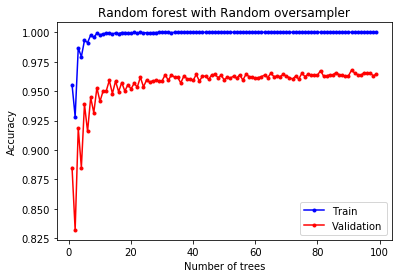

In [108]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

#Fitting it to train set
sampler=RandomOverSampler(random_state=0)
X_rs,y_rs=sampler.fit_sample(X_train,y_train)


from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X_rs,y_rs, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled= scaler.transform(X_test)


train_score_list = []
validation_list = []

for n_estimators in range(1, 100):
    # fit model
    forest = RandomForestClassifier(n_estimators = n_estimators)
    forest.fit(X_train, y_train)

    # score on training set 
    train_score = forest.score(X_train, y_train) 
    train_score_list.append(train_score)


    validation_score = forest.score(X_validation, y_validation)
    validation_list.append(validation_score)
    
    # tracking progress
    if n_estimators % 10 == 0:
        print(f"Done with {n_estimators}...")
    
# Plot
plt.figure()
plt.plot(range(1, 100), train_score_list, color = "blue", marker = ".", label = "Train")
plt.plot(range(1, 100), validation_list, color = "red", marker = ".", label = "Validation")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Random forest with Random oversampler")
plt.legend()
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=RandomOverSampler(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

X_test_scaled = scaler.transform(X_test)
best_forest = RandomForestClassifier(n_estimators= 20)
best_forest.fit(scaler.transform(X_train), y_train)
best_forest.score(X_test_scaled, y_test)

0.8742203742203742

In [111]:
pred= best_forest.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.90      1.00      0.95      1731

    accuracy                           0.90      1924
   macro avg       0.45      0.50      0.47      1924
weighted avg       0.81      0.90      0.85      1924



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


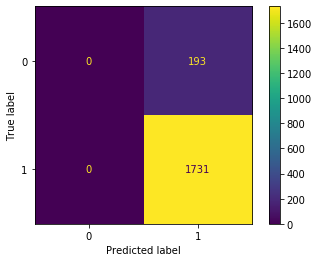

In [112]:
forest_mat_ro= confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(forest_mat_ro).plot()

There is a poor recall score and a bad confusion matrix which won't classify any start-ups to be in the class 0 

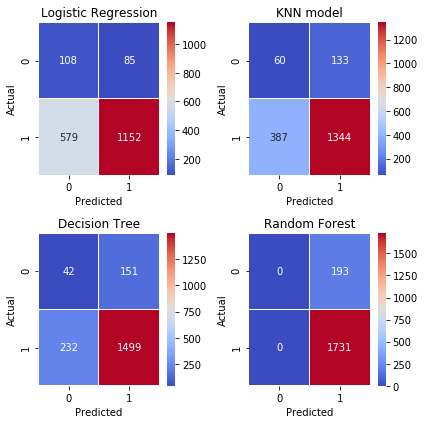

In [113]:
import seaborn as sns
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(6,6))
#fig('Correlation Matrix')

sns.heatmap(log_mat_ro, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[0,0] )
ax[0,0].set_title('Logistic Regression')
ax[0,0].set_ylabel('Actual')
ax[0,0].set_xlabel('Predicted')

sns.heatmap(knn_mat_ro, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[0,1] )
ax[0,1].set_title('KNN model')
ax[0,1].set_ylabel('Actual')
ax[0,1].set_xlabel('Predicted')

sns.heatmap(dt_mat_ro, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[1,0] )
ax[1,0].set_title('Decision Tree')
ax[1,0].set_ylabel('Actual')
ax[1,0].set_xlabel('Predicted')

sns.heatmap(forest_mat_ro, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[1,1] )
ax[1,1].set_title('Random Forest')
ax[1,1].set_ylabel('Actual')
ax[1,1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()
#sns.heatmap(knn_mat, annot= True, fmt='g')

After getting all the results with all the models with random oversampler we can see that though we got beter accuracies in some models and a bit better recall than the imbalance the models still misclassified a lot of data points so we need to find a better sampling method to overcome the class imbalance.


## SMOTE 

Let's try SMOTE technique and see if we find any changes or progress.

In [114]:
from imblearn.over_sampling import SMOTE

In [115]:
sampler=SMOTE(random_state=0)
x_rs,y_rs=sampler.fit_sample(X,y)

In [116]:
y_rs.value_counts()

1    8651
0    8651
Name: status, dtype: int64

Just to check and confirm that SMOTE has balanced our classes.

### LOG with SMOTE

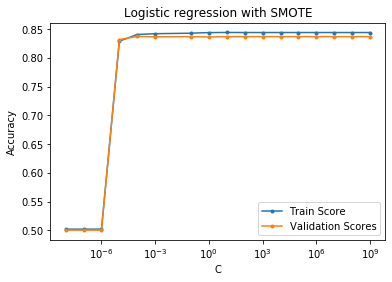

In [117]:
from sklearn.linear_model import LogisticRegression

validation_scores = []
train_scores = []

C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1,
                    1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

#Fitting SMOTE to train set
sampler=SMOTE(random_state=0)
X_rs,y_rs=sampler.fit_sample(X_train,y_train)

X_remainder, X_test, y_remainder, y_test= train_test_split(X_rs,y_rs, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3,random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.transform(X_validation)

# linear search over the hyper parameter space
for c in C_range:
    my_logreg = LogisticRegression(C=c, random_state=1)
    my_logreg.fit(X_train_scaled, y_train)

    # train on traning set
    train_scores.append(my_logreg.score(X_train_scaled, y_train))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation_scaled, y_validation))

plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic regression with SMOTE')
plt.legend()
plt.show()

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=SMOTE(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)
my_final_model = LogisticRegression(C=1, random_state=1)

# Remember that X_remainder and y_remainder held the data I split into train and validation
# I can use that data to re-train my model
my_final_model.fit(scaler.transform(X_train),y_train)
my_final_model.score(X_test_scaled, y_test)

0.7687110187110187

In [122]:
pred= my_final_model.predict(X_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.16      0.30      0.20       193
           1       0.91      0.82      0.86      1731

    accuracy                           0.77      1924
   macro avg       0.53      0.56      0.53      1924
weighted avg       0.84      0.77      0.80      1924



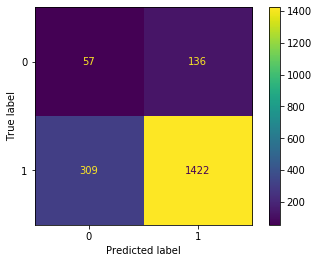

In [123]:
log_mat_smote= confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(log_mat_smote).plot()

Since logistic regression gave a poor accuracy on the test set and a poor recall for class 0, let's move on.

## KNN SMOTE

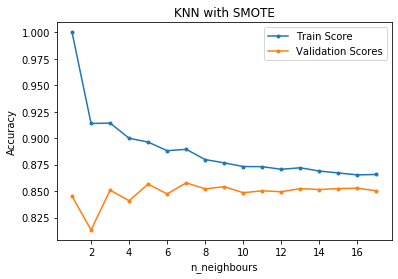

In [124]:


### KNN ###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

#Fitting SMOTE to train set
sampler=SMOTE(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)


from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X_rs,y_rs, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)
#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

validation_scores = []
train_scores = []

for i in range(1, X_train.shape[1]):
    my_KNN = KNeighborsClassifier(n_neighbors= i, n_jobs= -1)
    my_KNN.fit(X_train_scaled, y_train)
    
    # train on traning set
    train_scores.append(my_KNN.score(X_train_scaled, y_train))
    
    # score on validation set
    validation_scores.append(my_KNN.score(X_validation_scaled, y_validation))

plt.plot(range(1, X_train.shape[1]), train_scores,label="Train Score",marker='.')
plt.plot(range(1, X_train.shape[1]), validation_scores,label="Validation Scores",marker='.')
#plt.xscale('log')
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')
plt.title('KNN with SMOTE')
plt.legend()
plt.show()

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=SMOTE(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

X_test_scaled = scaler.transform(X_test)

best_model = KNeighborsClassifier(n_neighbors = 7)
best_model.fit(scaler.transform(X_train), y_train)
best_model.score(X_test_scaled, y_test)

0.7910602910602911

In [126]:
pred= best_model.predict(X_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.15      0.24      0.19       193
           1       0.91      0.85      0.88      1731

    accuracy                           0.79      1924
   macro avg       0.53      0.55      0.53      1924
weighted avg       0.83      0.79      0.81      1924



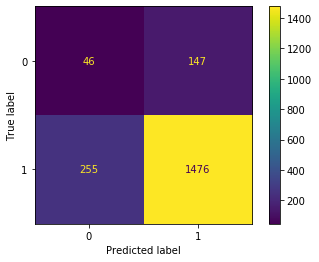

In [127]:
knn_mat_smote= confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(knn_mat_smote).plot()

KNN doesn't seem to be performin that well either.

## Decision tree SMOTE

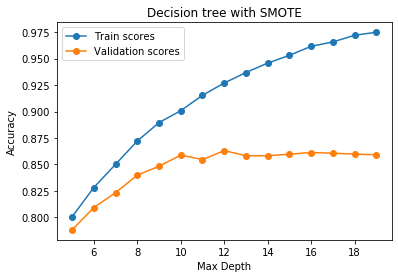

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

#Fitting SMOTE to train set
sampler=SMOTE(random_state=0)
X_rs,y_rs=sampler.fit_sample(X_train,y_train)


from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X_rs,y_rs, test_size= 0.2, random_state= 1)

X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled= scaler.transform(X_test)

validation_scores= []
train_scores= []

max_range= np.arange(5,20)
for d in max_range:
    dt= DecisionTreeClassifier(max_depth= d)
    dt.fit(X_train,y_train)

    validation_scores.append(dt.score(X_validation, y_validation))
    train_scores.append(dt.score(X_train, y_train))

plt.figure()
plt.plot(max_range, train_scores, label='Train scores', marker='o')
plt.plot(max_range, validation_scores, label= 'Validation scores', marker= 'o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Decision tree with SMOTE')
plt.show()


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=SMOTE(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

X_test_scaled = scaler.transform(X_test)
my_DT_model = DecisionTreeClassifier(max_depth = 12, random_state=1)
my_DT_model.fit(scaler.transform(X_train), y_train)
my_DT_model.score(X_test_scaled, y_test)

0.777027027027027

In [130]:
pred= my_DT_model.predict(X_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.17      0.32      0.22       193
           1       0.92      0.83      0.87      1731

    accuracy                           0.78      1924
   macro avg       0.54      0.57      0.55      1924
weighted avg       0.84      0.78      0.80      1924



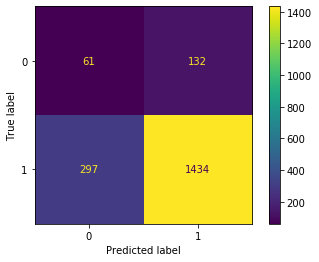

In [132]:
dt_mat_smote= confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(dt_mat_smote).plot()

## Random forest SMOTE

Done with 10...
Done with 20...
Done with 30...
Done with 40...
Done with 50...
Done with 60...
Done with 70...
Done with 80...
Done with 90...


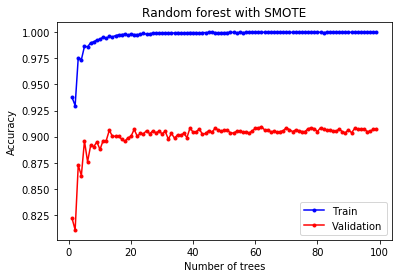

In [133]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=SMOTE(random_state=0)
X_rs,y_rs=sampler.fit_sample(X_train,y_train)


from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X_rs,y_rs, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled= scaler.transform(X_test)

#max_depth = 1

train_score_list = []
validation_list = []

for n_estimators in range(1, 100):
    # fit model
    forest = RandomForestClassifier(n_estimators = n_estimators)
    forest.fit(X_train_scaled, y_train)

    # score on training set
    train_score = forest.score(X_train_scaled, y_train) 
    train_score_list.append(train_score)

    validation_score = forest.score(X_validation_scaled, y_validation)
    validation_list.append(validation_score)
    
    # tracking progress
    if n_estimators % 10 == 0:
        print(f"Done with {n_estimators}...")
    
# Plot
plt.figure()
plt.plot(range(1, 100), train_score_list, color = "blue", marker = ".", label = "Train")
plt.plot(range(1, 100), validation_list, color = "red", marker = ".", label = "Validation")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Random forest with SMOTE")
plt.legend()
plt.show()

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)

sampler=SMOTE(random_state=0)
X_train,y_train=sampler.fit_sample(X_train,y_train)

X_test_scaled = scaler.transform(X_test)
best_forest = RandomForestClassifier(n_estimators= 10)
best_forest.fit(scaler.transform(X_train), y_train)
best_forest.score(X_test_scaled, y_test)

0.8222453222453222

In [135]:
pred= best_forest.predict(X_test_scaled)


In [136]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.19      0.23      0.21       193
           1       0.91      0.89      0.90      1731

    accuracy                           0.82      1924
   macro avg       0.55      0.56      0.55      1924
weighted avg       0.84      0.82      0.83      1924



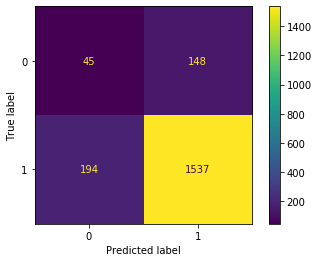

In [137]:
forest_mat_smote= confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(forest_mat_smote).plot()

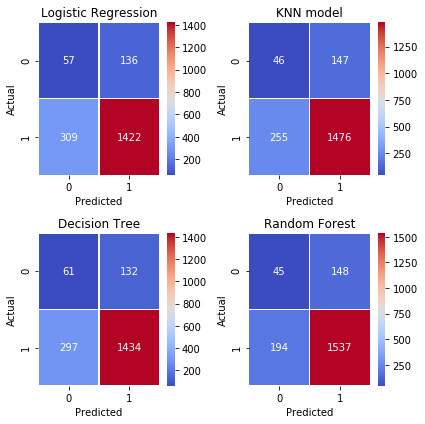

In [139]:
import seaborn as sns
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(6,6))
#fig('Correlation Matrix')

sns.heatmap(log_mat_smote, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[0,0] )
ax[0,0].set_title('Logistic Regression')
ax[0,0].set_ylabel('Actual')
ax[0,0].set_xlabel('Predicted')

sns.heatmap(knn_mat_smote, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[0,1] )
ax[0,1].set_title('KNN model')
ax[0,1].set_ylabel('Actual')
ax[0,1].set_xlabel('Predicted')

sns.heatmap(dt_mat_smote, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[1,0] )
ax[1,0].set_title('Decision Tree')
ax[1,0].set_ylabel('Actual')
ax[1,0].set_xlabel('Predicted')

sns.heatmap(forest_mat_smote, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[1,1] )
ax[1,1].set_title('Random Forest')
ax[1,1].set_ylabel('Actual')
ax[1,1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()
#sns.heatmap(knn_mat, annot= True, fmt='g')

Though the confusion matrixes seem a somewhat better than random oversampler, let's experiment with random upsampling.

## Random Upsampling

In [193]:
# Let's try random upsampling and see if it gives better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.utils import resample
# Upsample
print('Number of status 0 examples before:', X_train[y_train == 0].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                        y_train[y_train == 0], 
                                        replace=True, 
                                        n_samples=X_train[y_train == 1].shape[0], 
                                        random_state=123)

print('Number of status 0 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_bal2 = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_bal2 = np.hstack((y_train[y_train == 1], y_downsampled))

Number of status 0 examples before: 759
Number of status 0 examples after: 6934


Random Upsampling increased the samples from the class 0 and balanced our classes.

In [194]:
# Let's restate our features and target
X= pd.DataFrame(X_train_bal2, columns= X_train.columns)
X

,total_funding,state_code,funding_rounds,average_raised_usd,average_time_delay_rounds_number,No_Of_Investors,MainCategory_e-commerce,MainCategory_games,MainCategory_healthcare,MainCategory_manufacturing,MainCategory_medicalGear,MainCategory_mobile,MainCategory_pharma,MainCategory_software,MainCategory_technology,USA_Region_Northeast,USA_Region_South,USA_Region_West
0,687000.0,4.0,3.0,229000.0,336.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,665000.0,13.0,2.0,332500.0,676.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,44424979.0,23.0,3.0,14808326.0,814.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42150000.0,19.0,3.0,14050000.0,570.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,103795000.0,4.0,6.0,17299166.0,302.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13863,880000.0,42.0,3.0,293333.0,425.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13864,104999998.0,4.0,6.0,17499999.0,296.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13865,90200000.0,31.0,6.0,15033333.0,199.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13866,56200000.0,19.0,5.0,11240000.0,659.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [196]:
y= pd.DataFrame(y_train_bal2,columns= ['status'])
y

,status
0,1
1,1
2,1
3,1
4,1
...,...
13863,0
13864,0
13865,0
13866,0


In [197]:
y['status'].value_counts()

1    6934
0    6934
Name: status, dtype: int64

The classes are balanced.

## Logistic regression with Upsampling:

In [145]:
import warnings
warnings.filterwarnings("ignore")

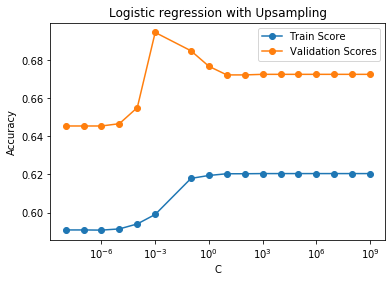

In [146]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state=1)

validation_scores = []
train_scores = []

C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1,
                    1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.fit_transform(X_test)

# linear search over the hyper parameter space
for c in C_range:
    my_logreg = LogisticRegression(C=c, random_state=1)
    my_logreg.fit(X_train_scaled, y_train)

    # train on traning set
    train_scores.append(my_logreg.score(X_train_scaled, y_train))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation_scaled, y_validation))

plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='o')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic regression with Upsampling')
plt.legend()
plt.show()

In [148]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state=1)
mylogreg= LogisticRegression(C= 1, random_state=1)
scaler= StandardScaler()
mylogreg.fit(scaler.fit_transform(X_train), y_train)
mylogreg.score(scaler.fit_transform(X_test), y_test)

0.6258111031002163

In [149]:
y_pred= mylogreg.predict(scaler.fit_transform(X_test))

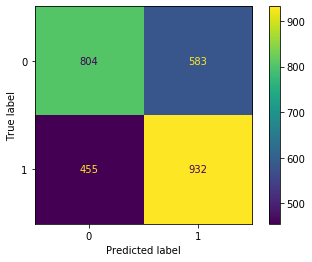

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import ConfusionMatrix

conf= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(conf).plot()

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1387
           1       0.62      0.67      0.64      1387

    accuracy                           0.63      2774
   macro avg       0.63      0.63      0.63      2774
weighted avg       0.63      0.63      0.63      2774



The accuracies are very poor the recall score seem to have increased in comparison to our other techniques, but let's try other models and see if we can find the one.

In [152]:
log_mat_up= confusion_matrix(y_test, y_pred)

## KNN with upsampling:

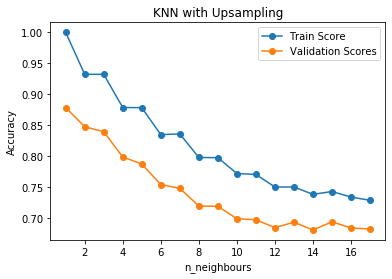

In [153]:


### KNN ###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3, 
                                                                random_state=1)
#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.fit_transform(X_test)

validation_scores = []
train_scores = []

for i in range(1, X_train.shape[1]):
    my_KNN = KNeighborsClassifier(n_neighbors= i, n_jobs= -1)
    my_KNN.fit(X_train_scaled, y_train)
    
    # train on traning set
    train_scores.append(my_KNN.score(X_train_scaled, y_train))
    
    # score on validation set
    validation_scores.append(my_KNN.score(X_validation_scaled, y_validation))

plt.plot(range(1, X_train.shape[1]), train_scores,label="Train Score",marker='o')
plt.plot(range(1, X_train.shape[1]), validation_scores,label="Validation Scores",marker='o')
#plt.xscale('log')
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')
plt.title('KNN with Upsampling')
plt.legend()
plt.show()

In [154]:
from sklearn.neighbors import KNeighborsClassifier
scaler= StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)
best_model = KNeighborsClassifier(n_neighbors = 2, n_jobs= -1)
X_test_scaled= scaler.fit_transform(X_test)
best_model.fit(scaler.fit_transform(X_train), y_train)
best_model.score(scaler.fit_transform(X_test), y_test)

0.9030281182408075

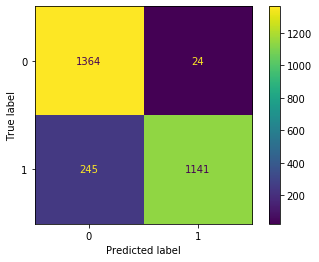

In [155]:
pred= best_model.predict(X_test_scaled)
conf= confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(conf).plot()

In [156]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1388
           1       0.98      0.82      0.89      1386

    accuracy                           0.90      2774
   macro avg       0.91      0.90      0.90      2774
weighted avg       0.91      0.90      0.90      2774



This model has given the best recall and accuracies but the graph seems to be deteriorating as well and the model performs poorly as we increase the neighbors so we can't use this model for our prediction.

In [157]:
knn_mat_up= confusion_matrix(y_test,pred)

## Decision tree with random upsampling:

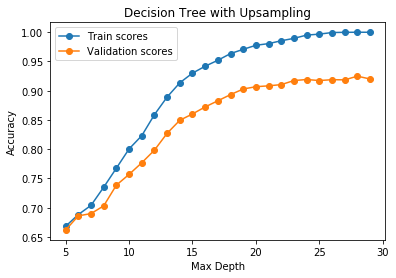

In [158]:
from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)

X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled- scaler.transform(X_test)

validation_scores= []
train_scores= []

max_range= np.arange(5,30)
for d in max_range:
    dt= DecisionTreeClassifier(max_depth= d)
    dt.fit(X_train,y_train)

    validation_scores.append(dt.score(X_validation, y_validation))
    train_scores.append(dt.score(X_train, y_train))

plt.figure()
plt.plot(max_range, train_scores, label='Train scores', marker='o')
plt.plot(max_range, validation_scores, label= 'Validation scores', marker= 'o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree with Upsampling')
plt.legend()
plt.show()


In [159]:
from sklearn.tree import DecisionTreeClassifier
scaler= StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)
my_DT_model = DecisionTreeClassifier(max_depth = 20, random_state=1)
my_DT_model.fit(scaler.fit_transform(X_train), y_train)
my_DT_model.score(scaler.fit_transform(X_test), y_test)

0.6207642393655372

In [163]:
pred= my_DT_model.predict(X_test_scaled)
dt_mat_up= confusion_matrix(y_test,pred)

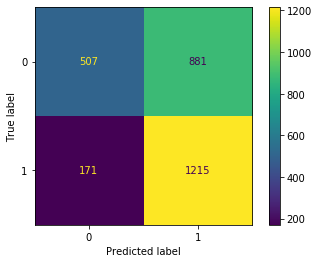

In [164]:
ConfusionMatrixDisplay(dt_mat_up).plot()

In [165]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.37      0.49      1388
           1       0.58      0.88      0.70      1386

    accuracy                           0.62      2774
   macro avg       0.66      0.62      0.59      2774
weighted avg       0.66      0.62      0.59      2774



Here we have a good accuracy but a poor recall score for class 0, so onto the next one!

## Random forest with random upsampling:

Done with 10...
Done with 20...
Done with 30...
Done with 40...
Done with 50...
Done with 60...
Done with 70...
Done with 80...
Done with 90...


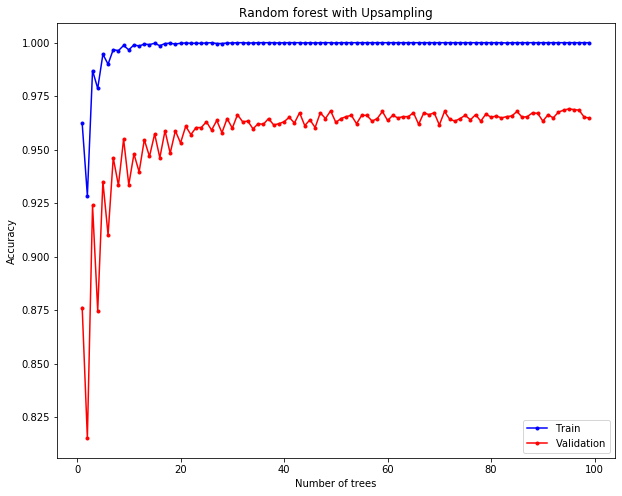

In [166]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled= scaler.transform(X_test)


train_score_list = []
validation_list = []

for n_estimators in range(1, 100):
    # fit model
    forest = RandomForestClassifier(n_estimators = n_estimators)
    forest.fit(X_train_scaled, y_train)

    # score on training set 
    train_score = forest.score(X_train_scaled, y_train) 
    train_score_list.append(train_score)


    validation_score = forest.score(X_validation_scaled, y_validation)
    validation_list.append(validation_score)
    
    # tracking progress
    if n_estimators % 10 == 0:
        print(f"Done with {n_estimators}...")
    
# Plot
plt.figure(figsize=(10,8))
plt.plot(range(1, 100), train_score_list, color = "blue", marker = ".", label = "Train")
plt.plot(range(1, 100), validation_list, color = "red", marker = ".", label = 'Validation')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Random forest with Upsampling")
plt.legend()
plt.show()

Done with 10...
Done with 20...


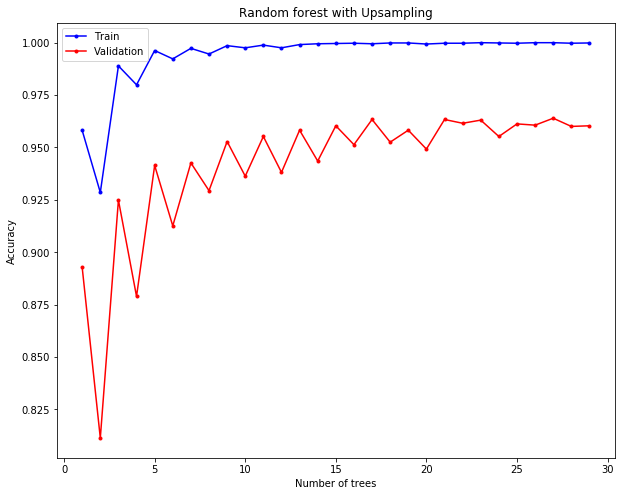

In [168]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled= scaler.transform(X_test)


train_score_list = []
validation_list = []

for n_estimators in range(1, 30):
    # fit model
    forest = RandomForestClassifier(n_estimators = n_estimators)
    forest.fit(X_train_scaled, y_train)

    # score on training set (CV?)
    train_score = forest.score(X_train_scaled, y_train) 
    train_score_list.append(train_score)

    # skip fitting and run this if you want cross validation
    # train_score = cross_val_score(forest, X_train, y_train, cv=3)
    # train_score_list.append(train_score)

    validation_score = forest.score(X_validation_scaled, y_validation)
    validation_list.append(validation_score)
    
    # tracking progress
    if n_estimators % 10 == 0:
        print(f"Done with {n_estimators}...")
    
# Plot
plt.figure(figsize=(10,8))
plt.plot(range(1, 30), train_score_list, color = "blue", marker = ".", label = "Train")
plt.plot(range(1, 30), validation_list, color = "red", marker = ".", label = 'Validation')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Random forest with Upsampling")
plt.legend()
plt.show()

We have to select n_estimators to be 5 since the model seems to be learning at this point and not overfitting yet and also has a high score.

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, stratify= y, random_state= 1)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
best_forest = RandomForestClassifier(n_estimators= 5, random_state= 1)
best_forest.fit(X_train_scaled, y_train)
best_forest.score(X_test_scaled, y_test)

0.9668348954578226

In [202]:
pred= best_forest.predict(X_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1387
           1       1.00      0.94      0.97      1387

    accuracy                           0.97      2774
   macro avg       0.97      0.97      0.97      2774
weighted avg       0.97      0.97      0.97      2774



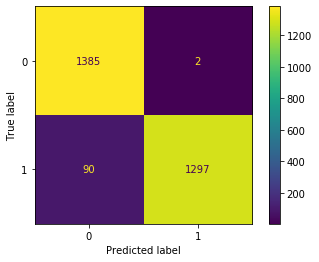

In [203]:
forest_mat_up= confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(forest_mat_up).plot()

This model gives the best confusion matrix i.e it correctly classifies the failed start-ups to be in the failed start-ups for class 0, which we had a problem classifying earlier.

Done with 10...
Done with 20...


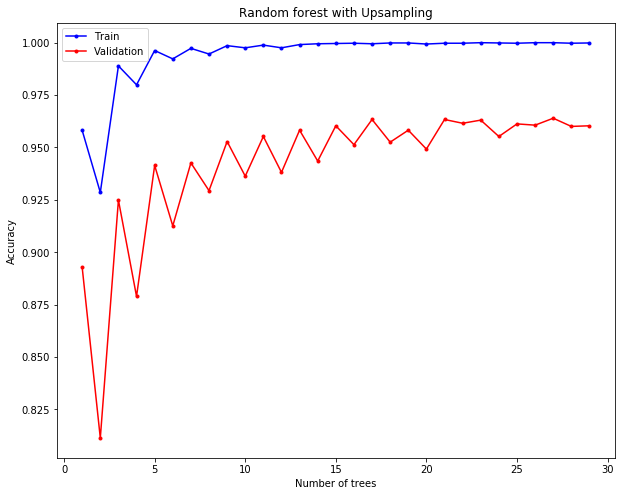

In [168]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
X_remainder, X_test, y_remainder, y_test= train_test_split(X,y, test_size= 0.2, random_state= 1)


X_train, X_validation, y_train, y_validation= train_test_split(X_remainder, y_remainder, test_size= 0.3, random_state= 1)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_validation_scaled= scaler.transform(X_validation)
X_test_scaled= scaler.transform(X_test)


train_score_list = []
validation_list = []

for n_estimators in range(1, 30):
    # fit model
    forest = RandomForestClassifier(n_estimators = n_estimators)
    forest.fit(X_train_scaled, y_train)

    # score on training set (CV?)
    train_score = forest.score(X_train_scaled, y_train) 
    train_score_list.append(train_score)

    # skip fitting and run this if you want cross validation
    # train_score = cross_val_score(forest, X_train, y_train, cv=3)
    # train_score_list.append(train_score)

    validation_score = forest.score(X_validation_scaled, y_validation)
    validation_list.append(validation_score)
    
    # tracking progress
    if n_estimators % 10 == 0:
        print(f"Done with {n_estimators}...")
    
# Plot
plt.figure(figsize=(10,8))
plt.plot(range(1, 30), train_score_list, color = "blue", marker = ".", label = "Train")
plt.plot(range(1, 30), validation_list, color = "red", marker = ".", label = 'Validation')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Random forest with Upsampling")
plt.legend()
plt.show()

This model has performed the best compared to all our models. The model has the best accuracy score of around 97% for the test set.\
**But this is a bit concerning** that the model seems to perform so well, as we can see from the graph that the model seems to be not learning and flat-lining for training set.\
But for the validation set, it learns until ~18 estimators and seem to flatline after that, since we have no other choice to consider, the only logical way to use this model would be to select the n-estimator to be 5 so that we don't allow the model to overfit or over-learn.\
**This model is our ideal model and can be used to draw predictions in the future.**

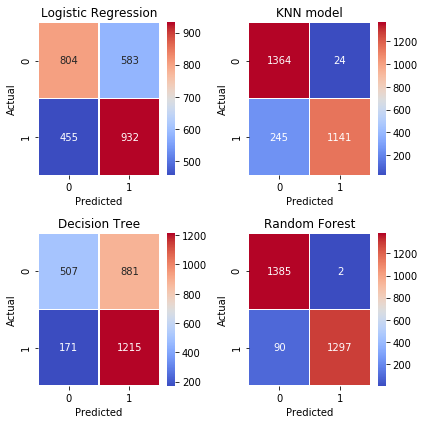

In [205]:
import seaborn as sns
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(6,6))
#fig('Correlation Matrix')

sns.heatmap(log_mat_up, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[0,0] )
ax[0,0].set_title('Logistic Regression')
ax[0,0].set_ylabel('Actual')
ax[0,0].set_xlabel('Predicted')

sns.heatmap(knn_mat_up, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[0,1] )
ax[0,1].set_title('KNN model')
ax[0,1].set_ylabel('Actual')
ax[0,1].set_xlabel('Predicted')

sns.heatmap(dt_mat_up, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[1,0] )
ax[1,0].set_title('Decision Tree')
ax[1,0].set_ylabel('Actual')
ax[1,0].set_xlabel('Predicted')

sns.heatmap(forest_mat_up, annot= True, fmt='g', linewidths=.1, cmap= 'coolwarm', ax= ax[1,1] )
ax[1,1].set_title('Random Forest')
ax[1,1].set_ylabel('Actual')
ax[1,1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()
#sns.heatmap(knn_mat, annot= True, fmt='g')

The confusion matrices are the best comparing to our previous methods of SMOTE and random oversampler.\
We can say that Random upsampling is our best method for our models since it classifies the class 0 better than the other techniques.